# Insurance Policy Claims:

© Explore Data Science Academy


# Introduction

In the complex landscape of the insurance industry, the efficacy of claim assessment processes is crucial for ensuring fair and accurate outcomes for policyholders. However, the current state of affairs presents challenges, including inconsistencies and potential biases that can impact the reliability of insurance claim resolutions. To address these issues, a forward-thinking solution has been proposed—one that transcends traditional approaches by incorporating a total loss perspective. This innovative strategy not only seeks to rectify losses for customers but also proactively prevents such losses, ushering in a new era of precision and efficiency.

At the heart of this transformative solution lies the integration of advanced artificial intelligence algorithms and machine learning models into the claim assessment process. By harnessing the power of cutting-edge technology, data analytics, and process optimizations, the goal is to forecast future claim amounts with unprecedented accuracy. This forward-looking approach aims to mitigate the impact of human error, streamline time-consuming processes, and bolster the overall reliability of insurance services.

The hypothesis driving this initiative posits that the infusion of advanced technology will yield substantial improvements in accuracy, consistency, and fairness. By focusing on predicting total claim amounts and addressing fundamental issues in the calculation process, this approach aims to revolutionize the insurance claim resolution process. The anticipated outcome is not only enhanced accuracy but also a reduction in errors, streamlined processes, and increased trust in insurance services.

A comprehensive analysis, grounded in machine learning models and data analytics, has uncovered key insights that form the bedrock of this innovative strategy. Recognizing and addressing data imbalance within the initial dataset, sophisticated techniques were employed to ensure unbiased predictions, fostering equitable outcomes. Additionally, the exploration of feature importance provides insurance companies with valuable guidance on understanding the factors that drive successful claim outcomes, enabling more informed decision-making.

Delving deeper into the analysis, the findings offer practical recommendations for insurance companies. From streamlining claim verification processes to developing comprehensive customer profiles and advocating for continuous model training, the roadmap to transformation becomes clear. This comprehensive approach not only optimizes current operations but also lays the groundwork for future advancements in insurance claim management.

# Problem Statement


The current state of the insurance industry's claim assessment process faces challenges in achieving optimal accuracy, resulting in inconsistencies and potential unfair outcomes for policyholders. To address this, a proposed solution revolves around incorporating a total loss perspective, not only focusing on rectifying losses for customers but also proactively aiding the company in preventing such losses. This innovative approach leverages advanced technologies, data analytics, and process optimizations to forecast future claim amounts, mitigating the impact of human error and streamlining time-consuming processes related to calculating claims. Furthermore, not only does it enhance overall accuracy but also contributes to minimizing errors, streamlining processes, building trust, and strengthening the credibility and efficiency of insurance services. 

# Hypothesis

The integration of advanced artificial intelligence algorithms and machine learning models into the claim assessment process is anticipated to yield substantial improvements in accuracy, consistency, and fairness. By focusing on predicting total claim amounts and addressing issues such as human error and time-consuming processes in calculating claim amounts, this approach aims to enhance the overall effectiveness of the insurance claim resolution process. The hypothesis posits that leveraging cutting-edge technology, particularly through meticulous data analytics and the selection of the most suitable predictive model, will enable the identification and rectification of inconsistencies in the data. It is expected that by addressing issues related to loss prevention, inaccurate claim amounts, and inconsistent data, the implementation of this advanced modeling approach will result in a more reliable and trustworthy claim evaluation system, ultimately fostering greater confidence among policyholders in the insurance claim resolution process.

<a id="cont"></a>

# Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Data Preprocessing </a>

<a href=#four>4. Exploratory Data Analysis(EDA)</a>

<a href=#five>5. Feature Engineering</a>

<a href=#eight>6. Conclusion</a>


<a id="one"></a>

## 1. Importing Packages

<a href=#cont>Back to Table of Contents</a>


In [109]:
# Imports
# data libraries
import pandas as pd #data manipulation 
import numpy as np #manages lists 
import matplotlib.pyplot as plt #plotting
import seaborn as sns #data visualisation

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# wordcloud
from wordcloud import WordCloud

# warning library
import warnings
warnings.filterwarnings("ignore")

<a id="two"></a>

## 2. Loading Data

<a href=#cont>Back to Table of Contents</a>


In [70]:
# Load the Data from Explore public data repository

url = "https://raw.githubusercontent.com/Explore-AI/Public-Data/master/insurance_claims.csv"

github_url = "https://github.com/Sigourney-Griffin/Integrated-Project/blob/main/insurance_claims.csv"

insurance_data = pd.read_csv(url)

In [71]:
# Initial Data Exploration
# Display the first few rows of the dataset
print(insurance_data.head())

   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...      

In [72]:
# Summary statistics
print(insurance_data.describe(include='all'))

#NaN means no info in column - need to feed empty rows with more meaningful data 

        months_as_customer          age  policy_number policy_bind_date  \
count          1000.000000  1000.000000    1000.000000             1000   
unique                 NaN          NaN            NaN              951   
top                    NaN          NaN            NaN       2006-01-01   
freq                   NaN          NaN            NaN                3   
mean            203.954000    38.948000  546238.648000              NaN   
std             115.113174     9.140287  257063.005276              NaN   
min               0.000000    19.000000  100804.000000              NaN   
25%             115.750000    32.000000  335980.250000              NaN   
50%             199.500000    38.000000  533135.000000              NaN   
75%             276.250000    44.000000  759099.750000              NaN   
max             479.000000    64.000000  999435.000000              NaN   

       policy_state policy_csl  policy_deductable  policy_annual_premium  \
count          1000    

### Dataset Description

The dataset pertains to insurance claims and encapsulates a wide array of information, spanning from customer details to specific claim-related data. The dataset provides a comprehensive view of the factors and variables that might influence or be indicative of an insurance claim, especially in the context of __.

1. **Customer Details**: Essential demographics of the insured party such as their age, tenure as a customer, and geographical information.
2. **Policy Information**: Key details about the insurance policy, including the policy number, bind date, deductibles, and annual premiums. This section also touches upon the umbrella limit associated with the policy.
3. **Claim Details**: This segment offers a detailed view of the claim, including the date of the incident, type of incident, severity, and the total claim amount. It also contains information about the authorities contacted in the aftermath of the incident.
4. **Vehicle Information**: Data related to the insured vehicle, including its make, model, and the year of manufacture.
5. **Fraud Indicator**: A binary indicator signifying whether a particular claim was fraudulent.

The dataset presents a holistic view, making it an invaluable asset for any analytical endeavor aiming to understand, predict, or mitigate insurance claim returns and losses.


<a id="three"></a>

## 3. Data Preprocessing

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


### Handling Missing Values

After identifying columns with missing values, we will take the following steps:

1. **Imputation**: For columns where missing values can be imputed, we'll use appropriate strategies like mean, median, or mode imputation, depending on the column's nature.
2. **Dropping Values**: For columns where imputation might not be appropriate, or if the missing values are significant, we may opt to drop those values or the entire column.
3. **Data Integrity Checks**: Ensure that the data, post-imputation, remains consistent and accurate.


### Other Preprocessing Steps

We'll undertake several preprocessing steps to prepare our data for modeling:

1. **Encoding Categorical Variables**: Convert categorical variables into a format suitable for machine learning models.
2. **Handling Outliers**: Identify and treat outliers in the dataset.
3. **Feature Scaling**: Ensure that features are on a similar scale.
4. **Feature Engineering**: Create new features or transform existing ones to improve model performance.


In [73]:
# Check for missing values - shows which data contains no infomation 
missing_values = insurance_data.isnull().sum() #take sum of empty rows and print how many are empty
print("Missing values per column:\n", missing_values)

Missing values per column:
 months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0


<a id="four"></a>

## 4. Exploratory Data Analysis (EDA)

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


### Data Visualization

Data visualization is the presentation of data in graphical or visual format, such as charts, graphs, and maps, to help people understand the patterns, trends, and insights hidden in the data. It plays a crucial role in making complex information more accessible and easily understandable. By transforming raw data into visual representations, individuals can quickly grasp the significance of the data, identify patterns, and make informed decisions. Data visualization is essential in fields ranging from business and science to education and journalism, as it enables effective communication of information, facilitates data-driven decision-making, and enhances overall comprehension of complex datasets.

#### Interpreting the Visualizations:

1. **Histogram**:
   - **Use**: Understand the distribution of a single variable.
   - **Observations**: Look for peaks (modes), spread, skewness, and outliers. Multiple peaks might indicate multiple groups within data. Skewness indicates the direction of the majority of data points.


2. **Box Plot**:
   - **Use**: Understand spread and central tendency.
   - **Observations**: Observe the median, interquartile range (IQR), whiskers, and outliers. A wide IQR indicates high variability. Outliers may indicate special cases or data entry errors.


3. **Scatter Plot**:
   - **Use**: Understand the relationship between two continuous variables.
   - **Observations**: Look for direction, form, strength, and outliers. A positive direction means as one variable increases, the other does too. Outliers may indicate special cases.


4. **Heatmaps**:
   - **Use**: Visualize matrix-like data or correlations between variables.
   - **Observations**: Darker colors typically represent higher values. In correlation heatmaps, darker cells indicate strong correlations which can be useful for feature selection.


5. **Pie/Donut Chart**:
   - **Use**: Understand the proportion of categories in a categorical variable.
   - **Observations**: Larger slices indicate more common categories.


6. **Violin Plot**:
   - **Use**: Understand distribution of data across categories.
   - **Observations**: Width indicates density. The white dot represents the median of the data.


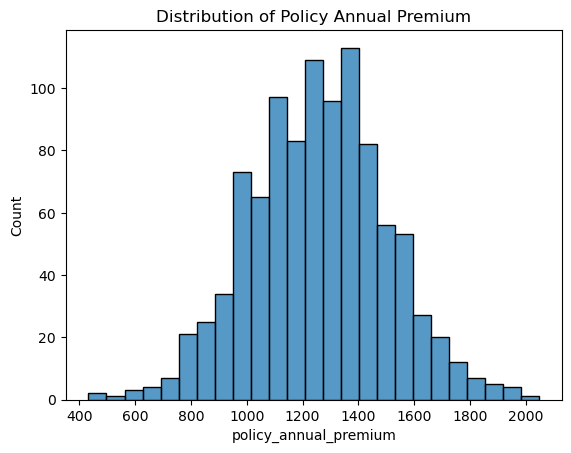

In [74]:
# Distribution of Policy Annual Premium
sns.histplot(insurance_data['policy_annual_premium'])
plt.title('Distribution of Policy Annual Premium')
plt.show()

The histogram depicting the distribution of policy annual premiums in the insurance data offers insightful observations for the project landscape. This visual representation aids in understanding policyholder preferences, identifying outliers that may have implications for claim assessments, and aligning premium levels with industry challenges. The premium distribution data is particularly relevant to resource allocation and training for claim assessors, as it provides a nuanced view of market trends and customer behaviors associated with different premium ranges. Moreover, the graph indirectly connects to customer expectations and satisfaction, emphasizing the need for insurers to tailor their claim assessment processes accordingly. Leveraging this information in advanced analytics and decision-making strategies can enhance the accuracy of claim assessments and contribute to addressing the broader challenges within the insurance industry.

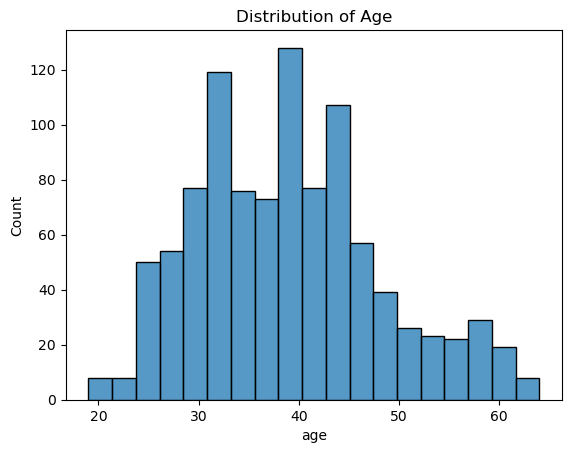

In [75]:
# Distribution of Age
sns.histplot(insurance_data['age'])
plt.title('Distribution of Age')
plt.show()

In examining the distribution of age in the insurance dataset, a prominent observation is that the majority of policyholders are concentrated within the age range of 33 to 43, as indicated by the peak in the histogram. This finding suggests that individuals within this specific age bracket may either possess the financial means to afford the insurance policy or exhibit a heightened awareness of the necessity for insurance coverage. The concentration of policyholders in this age group holds implications for understanding the target demographic and tailoring insurance products and communication strategies accordingly. Moreover, this insight into age distribution aligns with industry challenges, such as addressing customer expectations and optimizing communication channels to effectively engage with individuals within the identified age range. The data on age distribution thus becomes a valuable component in crafting targeted and resonant approaches within the broader context of improving claim assessments and enhancing the overall insurance experience.

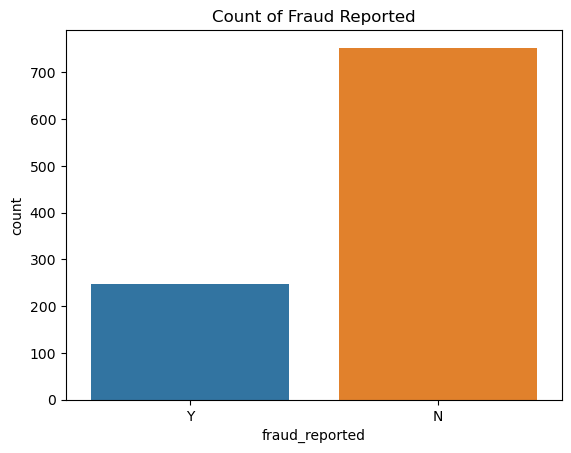

In [76]:
# Count of Fraud Reported
sns.countplot(x='fraud_reported', data=insurance_data)
plt.title('Count of Fraud Reported')
plt.show()

The count plot illustrating the reported instances of fraud in the insurance dataset reveals a crucial aspect of the claim assessment landscape. The observation that fraud is reported but not necessarily solved suggests a potential inconsistency in data, as it implies that not all reported cases may have been elevated to law enforcement or confirmed as criminal activities. This inconsistency underscores the importance of refining fraud detection mechanisms and addressing potential gaps in the reporting and resolution processes within the insurance industry.

Furthermore, the identification of certain demographics, as hinted at in the previous age distribution analysis, becomes even more significant in the context of fraud reporting. The concentration of reported fraud within specific age groups, as well as potential correlations with education levels, signifies that these demographics might be the target audience for more focused fraud prevention and education initiatives. Understanding the interplay between demographics and fraud reporting can guide insurers in tailoring their strategies to effectively mitigate fraud risks and enhance the accuracy of claim assessments.

In [77]:
# Further Analysis
# Average claim amount by fraud reported
avg_claim_by_fraud = insurance_data.groupby('fraud_reported')['total_claim_amount'].mean()
print("Average claim amount by fraud reported:\n", avg_claim_by_fraud)

Average claim amount by fraud reported:
 fraud_reported
N    50288.605578
Y    60302.105263
Name: total_claim_amount, dtype: float64


### Handling Missing Values

In our given dataset, some columns have missing values or placeholders that need addressing:

1. **Dropping Columns**: Columns that contain only missing values or don't provide valuable information can be dropped. The column `_c39` is one such column, which only contains missing values and hence will be removed.
2. **Replacing Placeholders**: The `police_report_available` column contains placeholders ('?') which we will replace with 'UNKNOWN' for clarity.
3. **Consistent Handling**: Ensure that if '?' is used as a placeholder in other columns, we apply consistent handling across the dataset.


### Unknowns and other special characters

In [78]:
# Replace '?' with 'UNKNOWN' in the 'police_report_available' column
insurance_data['police_report_available'] = insurance_data['police_report_available'].replace('?', 'UNKNOWN')
print(insurance_data['police_report_available'].value_counts())

UNKNOWN    343
NO         343
YES        314
Name: police_report_available, dtype: int64


In [79]:
insurance_data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,UNKNOWN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,UNKNOWN,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,UNKNOWN,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [80]:
# Calculate Q1, Q3, and IQR - determining anomalies 
# 
Q1 = insurance_data['total_claim_amount'].quantile(0.25)
Q3 = insurance_data['total_claim_amount'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(Q1)
print(Q3)

28780.0
41812.5
70592.5


In [81]:
# Define bounds - min & max data points 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [82]:
# Identify anomalies
anomalies = insurance_data[(insurance_data['total_claim_amount'] < lower_bound) | (insurance_data['total_claim_amount'] > upper_bound)]
print(f"Number of anomalies detected: {len(anomalies)}")

Number of anomalies detected: 1


In [83]:
# Extract the anomalous record - try to find data 
anomalous_record = insurance_data[(insurance_data['total_claim_amount'] < lower_bound) | (insurance_data['total_claim_amount'] > upper_bound)]
print(anomalous_record.transpose()) #switch matrics 

                                                  11
months_as_customer                               447
age                                               61
policy_number                                 214618
policy_bind_date                          1999-05-29
policy_state                                      OH
policy_csl                                   100/300
policy_deductable                               2000
policy_annual_premium                        1137.16
umbrella_limit                                     0
insured_zip                                   615561
insured_sex                                   FEMALE
insured_education_level                  High School
insured_occupation                   exec-managerial
insured_hobbies                            skydiving
insured_relationship                  other-relative
capital-gains                                      0
capital-loss                                  -51000
incident_date                             2015

### Further Exploration


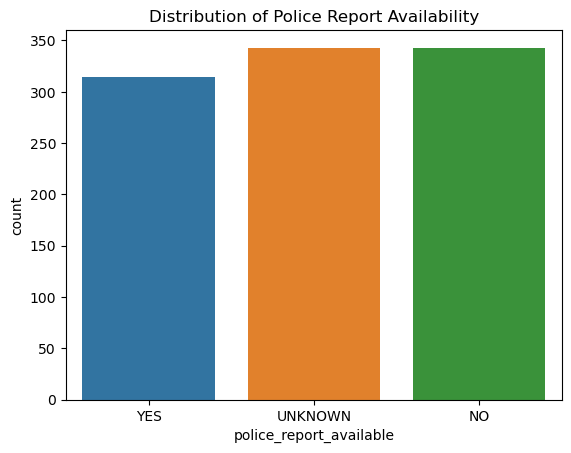

In [84]:
# Distribution Analysis # study of features
sns.countplot(x='police_report_available', data=insurance_data)
plt.title('Distribution of Police Report Availability')
plt.show()

The bar graph portraying the distribution of "police_report_available" reveals a substantial imbalance, with a prominent peak indicating a significant number of instances without a police report. This skew prompts concerns about potential challenges in subsequent data analysis and modeling, particularly if a police report is crucial for predictions. The visualization not only highlights data quality issues but also offers insights for decision-making, resource allocation, and policy considerations. It serves as a concise communication tool, conveying the prevalence of cases lacking a police report to stakeholders. Additionally, it instigates further exploration into correlations with other variables, such as incident severity or demographic information, and underscores the need to address the dataset's imbalance for more robust analyses

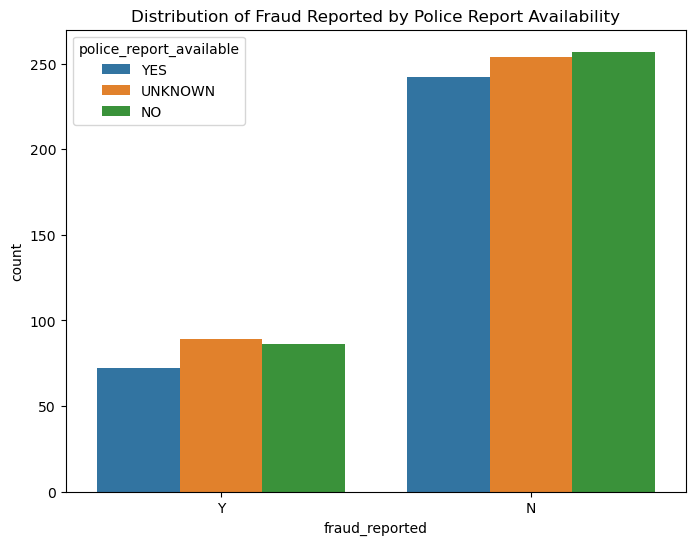

In [85]:
# Impact on Fraud Reporting
plt.figure(figsize=(8, 6))
sns.countplot(x='fraud_reported', hue='police_report_available', data=insurance_data)
plt.title('Distribution of Fraud Reported by Police Report Availability')
plt.show()

The provided graph illustrates the distribution of reported fraud cases based on the availability of police reports, revealing a notable prevalence of cases without fraud reporting. The 'No' bar, representing instances where fraud was not reported, is larger, suggesting a substantial portion of the dataset did not involve fraud. Within this category, a significant proportion lacks a corresponding police report, indicating that cases without fraud reporting often do not require law enforcement involvement. Possible implications include the resolution of non-fraud cases without the need for police reports, potentially influencing operational processes for insurance companies and investigators. It is essential to consider data quality and variations in documentation when interpreting these findings, prompting further investigation into specific reasons for the absence or presence of police reports in cases without fraud reporting. In summary, the graph provides valuable insights for refining fraud detection and claims processing strategies in the insurance domain, emphasizing the need for deeper analysis and consideration of operational implications.

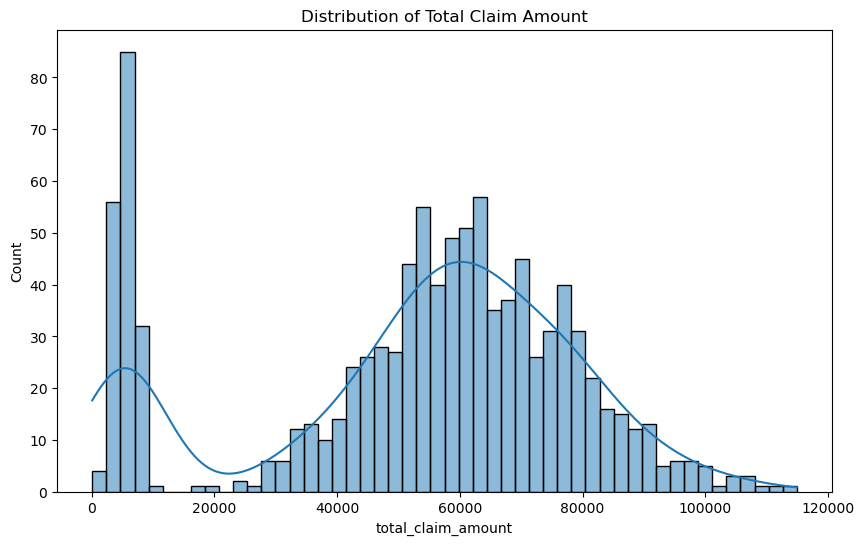

In [86]:
# Total Claim Amount Analysis
plt.figure(figsize=(10, 6))
sns.histplot(insurance_data['total_claim_amount'], bins=50, kde=True) #
plt.title('Distribution of Total Claim Amount')
plt.show()

The histogram illustrates the distribution of total claim amounts in the dataset, revealing a right-skewed pattern with a concentration of claims on the lower end. Most claims fall within a relatively uniform range, suggesting a commonality in the magnitudes of these insurance claims. However, a noticeable outlier, represented by data points with total claim amounts exceeding 20,000, stands out as a deviation from the general trend. This outlier indicates the presence of a rare or extreme case, potentially involving a severe or unique insurance claim. Understanding the nature of this outlier could provide valuable insights into the factors influencing higher claim amounts. In analyzing the data, it is crucial to consider whether the total claim amounts align with industry norms, and further exploration, such as examining policy characteristics associated with higher claims, can contribute to a more comprehensive understanding of the dataset.

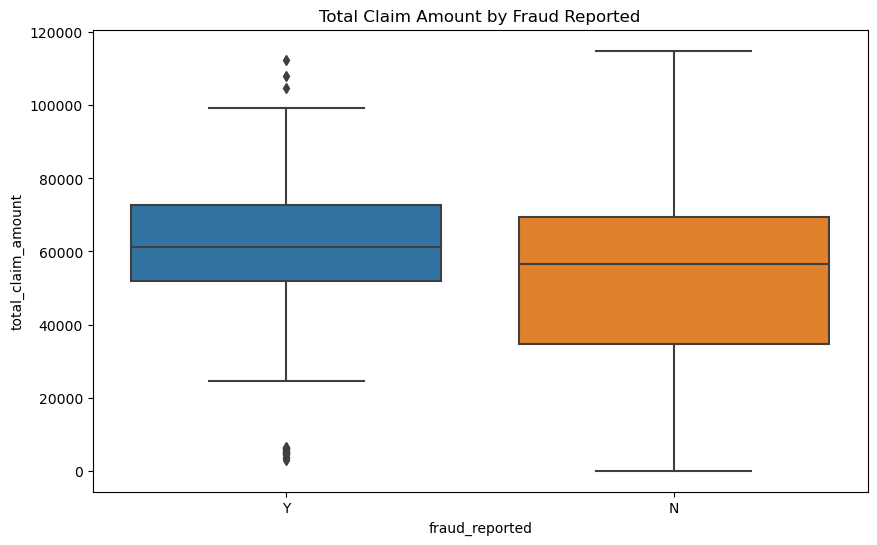

In [87]:
# Fraud Analysis - total claim amount 
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_reported', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Fraud Reported')
plt.show()

The box-and-whisker plot illustrates the distribution of total claim amounts in the context of fraud reporting, specifically focusing on cases where fraud is reported as 'No.' The median line within the box signifies the midpoint of the total claim amount distribution for this category, providing a central measure for typical values. The interquartile range (IQR), represented by the box, encapsulates the central 50% of the data, offering insights into the variability of total claim amounts. Outliers, identified beyond the whiskers, may indicate unusual values requiring further investigation. The shape of the distribution within the box provides a sense of the data's skewness. Comparisons with cases where fraud is reported ('Yes') can highlight differences in median, IQR, and the presence of outliers. In summary, the box-and-whisker plot serves as a valuable tool for understanding the central tendency and variability of total claim amounts in instances where fraud is not reported, aiding in the identification of patterns relevant to fraud analysis in the insurance dataset.

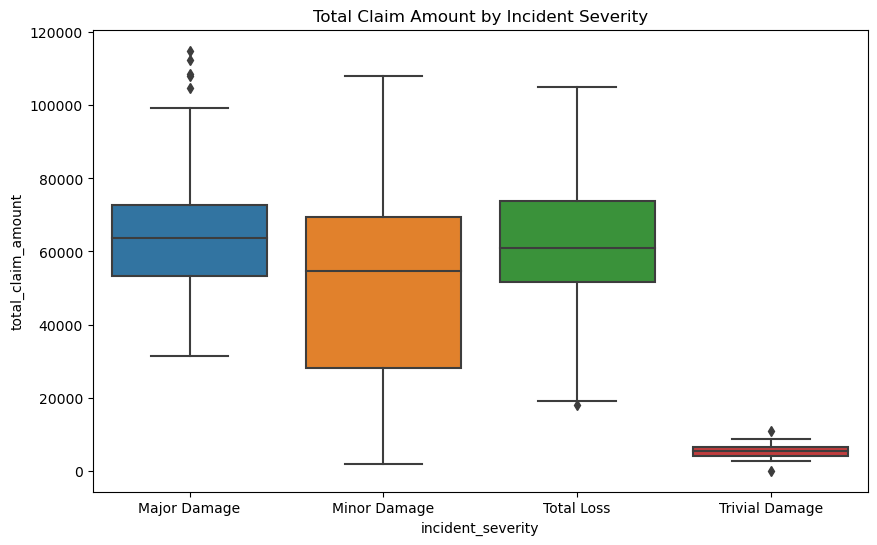

In [88]:
# Incident Severity Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='incident_severity', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Incident Severity')
plt.show()

The box-and-whisker plot reveals several insights into the relationship between incident severity levels and their corresponding total claim amounts in the insurance data. Notably, 'Minor Damage' incidents exhibit the largest box, suggesting a concentrated distribution of total claim amounts within a specific range, and the median line within this box provides a benchmark for typical claim amounts in this category. In contrast, 'Major Damage,' 'Total Loss,' and 'Trivial Damage' incidents show varying central tendencies, variabilities, and the presence of outliers, allowing for a nuanced understanding of how different incident severities impact the overall distribution of total claim amounts. Overall, the plot provides a comprehensive visual analysis, enabling stakeholders to identify patterns and make informed decisions related to incident severity and insurance claim amounts.

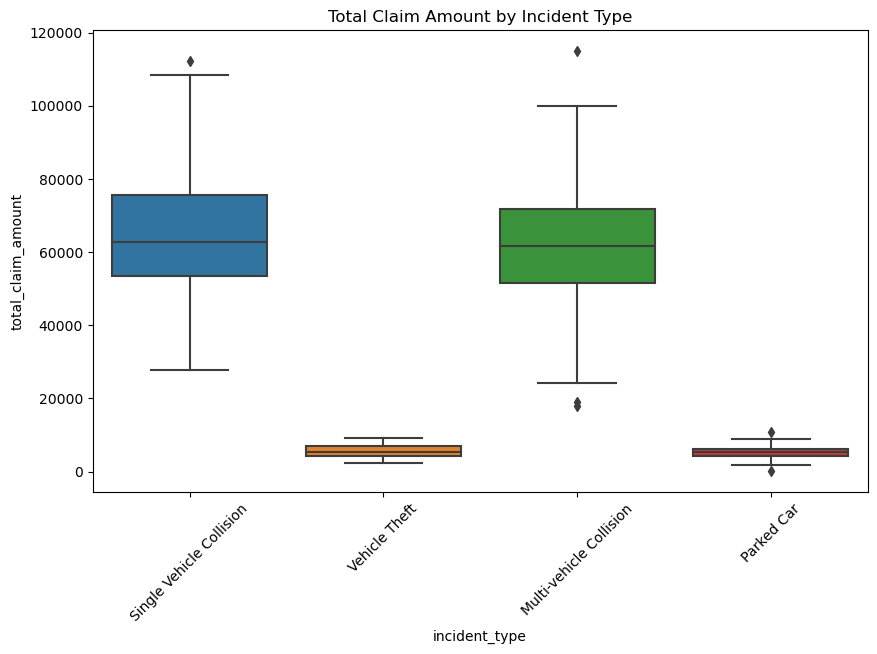

In [89]:
# Incident Type Analysis - by total claim amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='incident_type', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Incident Type')
plt.xticks(rotation=45)
plt.show()

The box-and-whisker plot, which analyzes total claim amounts categorized by incident types with a specific focus on 'Single Vehicle Collision' and 'Multi-Vehicle Collision,' demonstrates comparable median values, indicating similar average claim amounts for these two incident types. Both categories exhibit even distributions with similarly sized boxes, suggesting that the central 50% of total claim amounts is spread across comparable ranges. Notably, 'Single Vehicle Collision' and 'Multi-Vehicle Collision' stand out with the largest boxes among the incident types, emphasizing substantial concentration and variability in total claim amounts within their respective distributions. These characteristics can be attributed to various factors, including the inherent nature of incidents, the number of parties involved, the severity of damages incurred, differences in insurance coverage and policy limits, and the frequency of incidents within the dataset. Understanding these factors is crucial for insurers and analysts to make informed decisions regarding risk assessment, claims processing, and policy pricing. It enables a more nuanced interpretation of the data and assists in identifying patterns contributing to the observed characteristics in the box-and-whisker plot

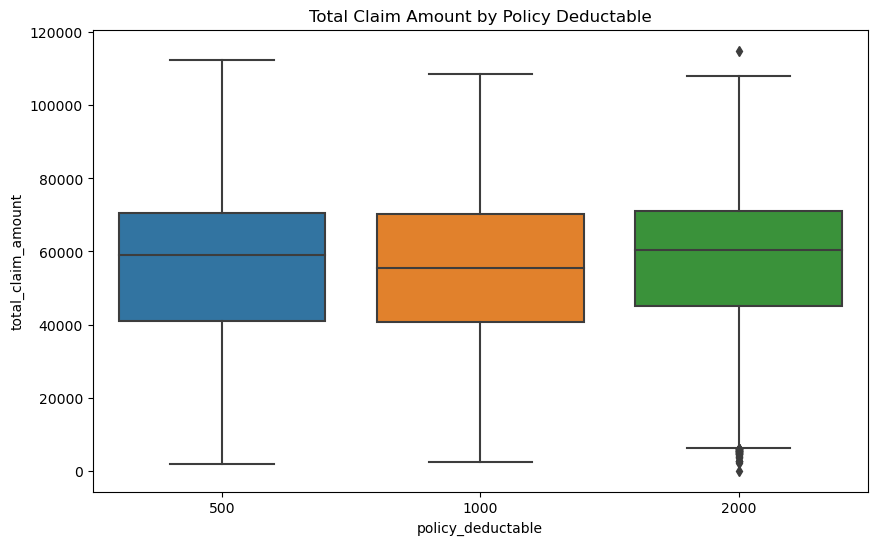

In [90]:
# Policy Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='policy_deductable', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Policy Deductable')
plt.show()

The box-and-whisker plot scrutinizing total claim amounts categorized by policy deductibles, specifically focusing on '500' and '1000,' provides crucial insights into the relationship between deductible levels and insurance claims. The plot reveals that the median total claim amounts for both '500' and '1000' deductibles are even, indicating comparable average claim amounts. The boxes for these deductibles are of similar sizes, suggesting consistent interquartile ranges (IQR) and an even distribution of total claim amounts within comparable ranges. This implies that policyholders with deductibles set at '500' and '1000' experience comparable claims, and the variability in total claim amounts is consistent between these two deductible categories. These observations could be influenced by factors such as policyholder behavior, similar risk perceptions, shared demographic characteristics, analogous policy design and premiums, and a comparable risk pool composition. Understanding these factors is crucial for insurers in tailoring policies, assessing risk accurately, and setting appropriate premium levels, ensuring a fair and consistent experience for policyholders with deductibles set at '500' and '1000.'

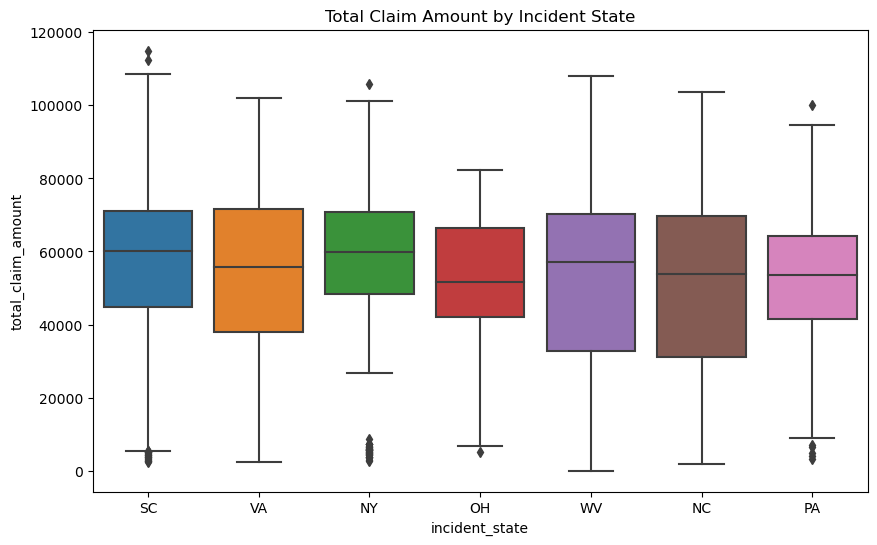

In [91]:
# Location Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='incident_state', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Incident State')
plt.show()

The boxplot analysis of total claim amounts across different incident states reveals notable variability, with some states exhibiting wider variations in claims. Specifically, West Virginia, North Carolina, and Virginia display similar characteristics in terms of median total claim amounts and interquartile ranges, suggesting consistent patterns in these states compared to others in the dataset. To gain a more comprehensive understanding of these similarities, further analysis should consider factors such as the nature of incidents, demographic and economic influences, regulatory environments, insurance policy characteristics, geographical and climate considerations, claims processing efficiency, and cultural or social factors. Examining outliers in the data could provide insights into specific incidents or circumstances contributing to exceptional total claim amounts. This multidimensional approach will contribute to a nuanced and accurate understanding of the dynamics influencing insurance claims in West Virginia, North Carolina, and Virginia.

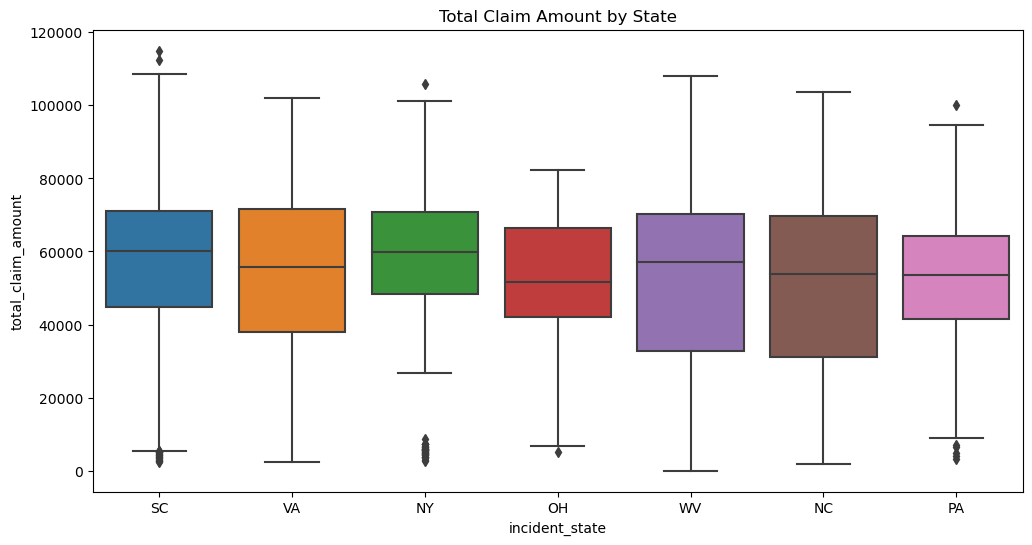

In [92]:
# Distribution of Claim Amounts by State and City
plt.figure(figsize=(12, 6))
sns.boxplot(x='incident_state', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by State')
plt.show()

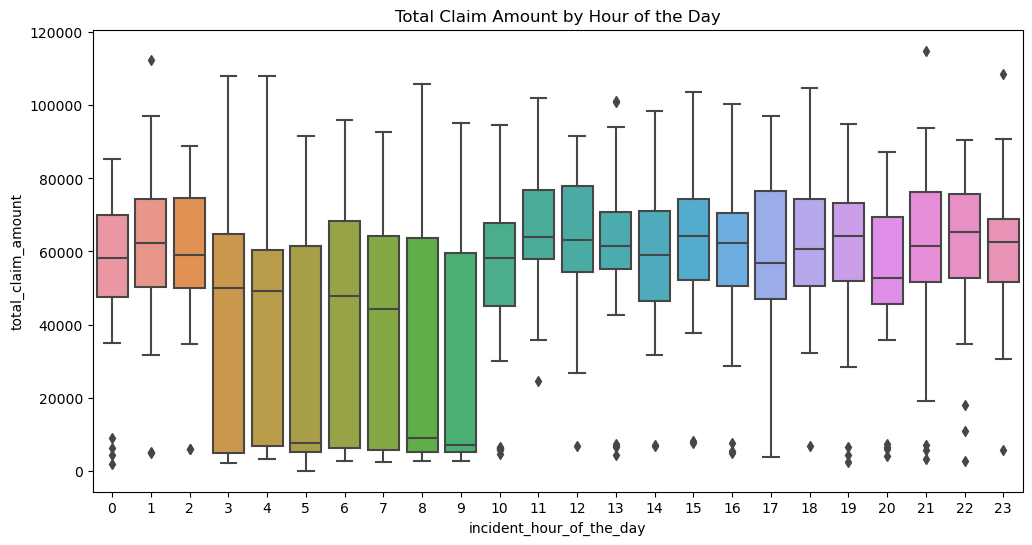

In [93]:
# Claim Amounts by Time of the Day
plt.figure(figsize=(12, 6))
sns.boxplot(x='incident_hour_of_the_day', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Hour of the Day')
plt.show()

The observed peak in insurance claims between 3 AM and 9 AM could be attributed to several factors. One potential explanation is the higher incidence of traffic accidents during early morning commutes, as this time frame coincides with increased road traffic as people head to work. Additionally, during these early hours, drivers and individuals may experience fatigue and reduced alertness, stemming from factors such as insufficient sleep or circadian rhythm effects, thereby elevating the risk of accidents and subsequent insurance claims. Weather conditions, including fog or dew on the roads in certain regions during the early morning, could further contribute to accidents and claims. It's crucial to consider whether the observed pattern is a statistical anomaly or if specific events during those hours contribute to higher claim amounts, accounting for potential fraud-related activities, such as staged accidents, which may be more likely to occur during specific times. Furthermore, variations in emergency services' response times during the early morning hours could impact the reporting and processing of claims. To gain more specific insights, a thorough investigation into the characteristics of claims during these hours, including incident types and locations, is recommended. Additionally, consulting domain experts and conducting a detailed analysis of the data, considering temporal patterns, categorical variables like fraud reports, driver behavior, and external factors, can provide a more comprehensive understanding of the observed pattern.

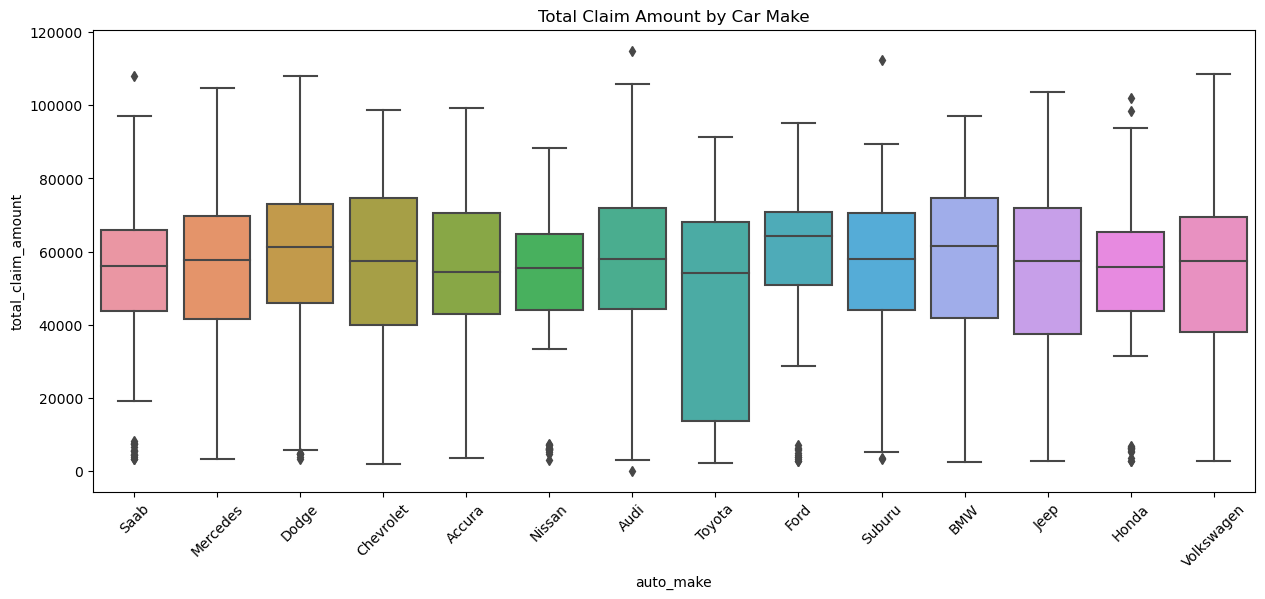

In [95]:
# Claim Amounts by Car Make and Model
plt.figure(figsize=(15, 6))
sns.boxplot(x='auto_make', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Car Make')
plt.xticks(rotation=45)
plt.show()

Toyota's higher frequency of accidents, as indicated by the dataset, could stem from various factors. It's possible that driving patterns, environmental conditions, and the behavior of Toyota drivers contribute to a heightened incidence of accidents. Moreover, the diversity among different Toyota models may lead to distinct characteristics influencing higher claim amounts—certain models might be more susceptible to specific accident types or incur elevated repair costs. Safety ratings and features across Toyota vehicles also play a role; lower safety ratings or the absence of advanced safety features might contribute to increased claims. Regional factors and driving conditions in areas where Toyota drivers operate may pose higher risks, thereby resulting in a greater number of accidents and subsequent insurance claims. Additionally, the demographic profile of Toyota drivers, including those associated with higher claim rates, may further contribute to the observed pattern. If the cost of repairs for Toyota vehicles is notably higher than other car makes, especially in incidents involving significant damage, it would naturally contribute to larger claim amounts. Lastly, the potential for Toyota drivers to operate in areas with higher traffic density or congestion might increase the likelihood of accidents, contributing to the overall trend of elevated insurance claims.

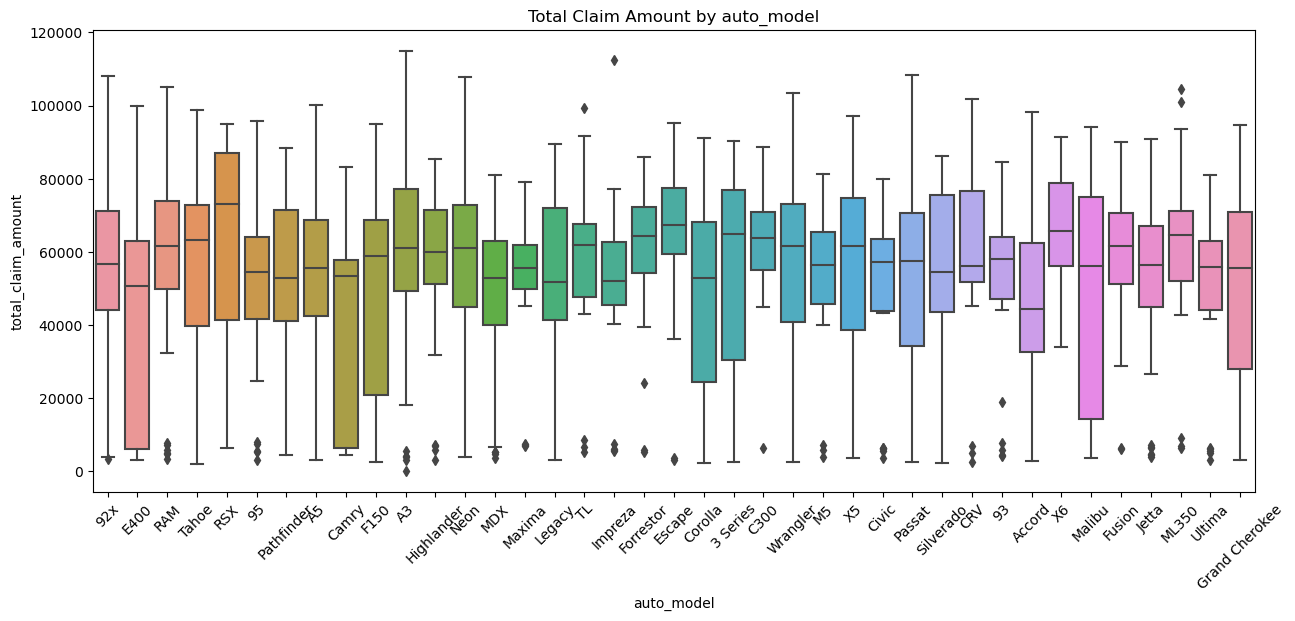

In [96]:
# Claim Amounts by auto_model
plt.figure(figsize=(15, 6))
sns.boxplot(x='auto_model', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by auto_model')
plt.xticks(rotation=45)
plt.show()

The boxplot highlighting total claim amounts suggests not only variations in incident frequencies but also potential implications related to the cost of certain car models. It is plausible that some models, while cheaper, may be associated with their own set of problems, potentially impacting specific demographics. Lower-cost models might be more prevalent among certain groups, and their affordability could attract drivers with diverse driving habits or demographics that could contribute to a higher frequency of incidents. Analyzing the cost dynamics alongside demographic profiles and driving behaviors associated with each model is crucial for a comprehensive understanding of the observed patterns in incident rates.

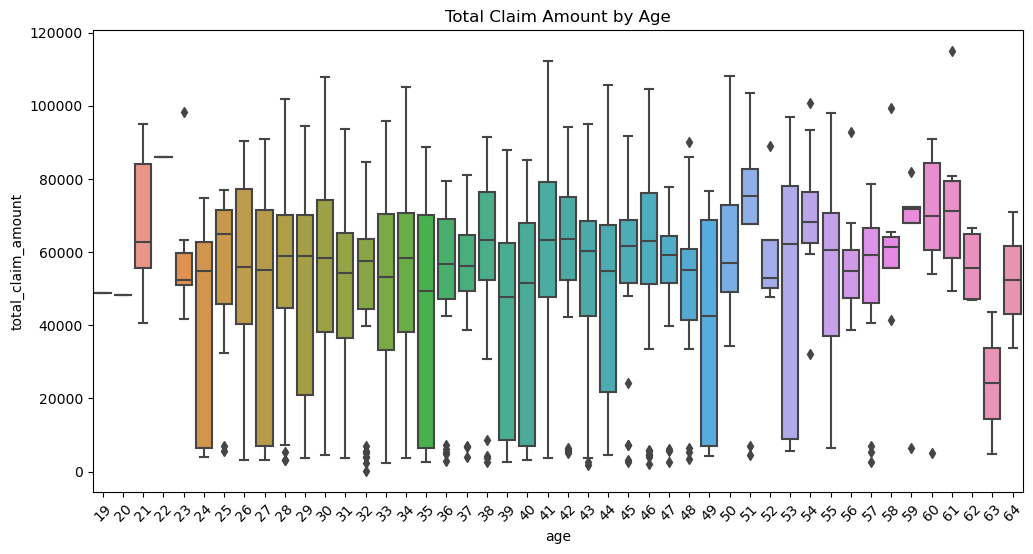

In [97]:
# Distribution of Claim Amounts by Age
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Age')
plt.xticks(rotation=45)
plt.show()

The boxplot depicting the distribution of total claim amounts by age reveals a prominent trend, with individuals between the ages of 23 to 53 exhibiting a higher likelihood of claiming insurance. This phenomenon can be attributed to several factors. Firstly, this age range encompasses individuals who are typically in the midst of their working years, engaging in regular commutes for employment purposes. The increased time spent on the road for work-related activities elevates the risk of accidents, thereby contributing to a higher frequency of insurance claims. Additionally, this age group often represents individuals with families or households, leading to more frequent use of vehicles for family-related activities and responsibilities, which in turn increases the likelihood of claims. Furthermore, the driving behaviors within this age range may be influenced by a combination of driving experience, risk-taking tendencies, and financial stability. Younger drivers below the age of 23 may exhibit riskier behavior, while those above the age of 53 may adopt more cautious habits.

In [98]:
!pip install WordCloud

In [100]:
#takes in colum data (dataframe column) and produces images with no. of words that frequent the most in data - shows automake and correlates with claims that are made etc

def generate_wordcloud(column_data, title, ax):
    """
    Generate word cloud for a given column data.
    
    Parameters:
    - column_data: Data for which word cloud will be generated.
    - title: Title for the word cloud.
    - ax: Axes object on which word cloud will be plotted.
    """
    # Get word frequencies and keep top 20
    word_freq = column_data.value_counts().to_dict()
    word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True)[:20])
    
    wordcloud = WordCloud(width=400, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(title, fontsize=16)

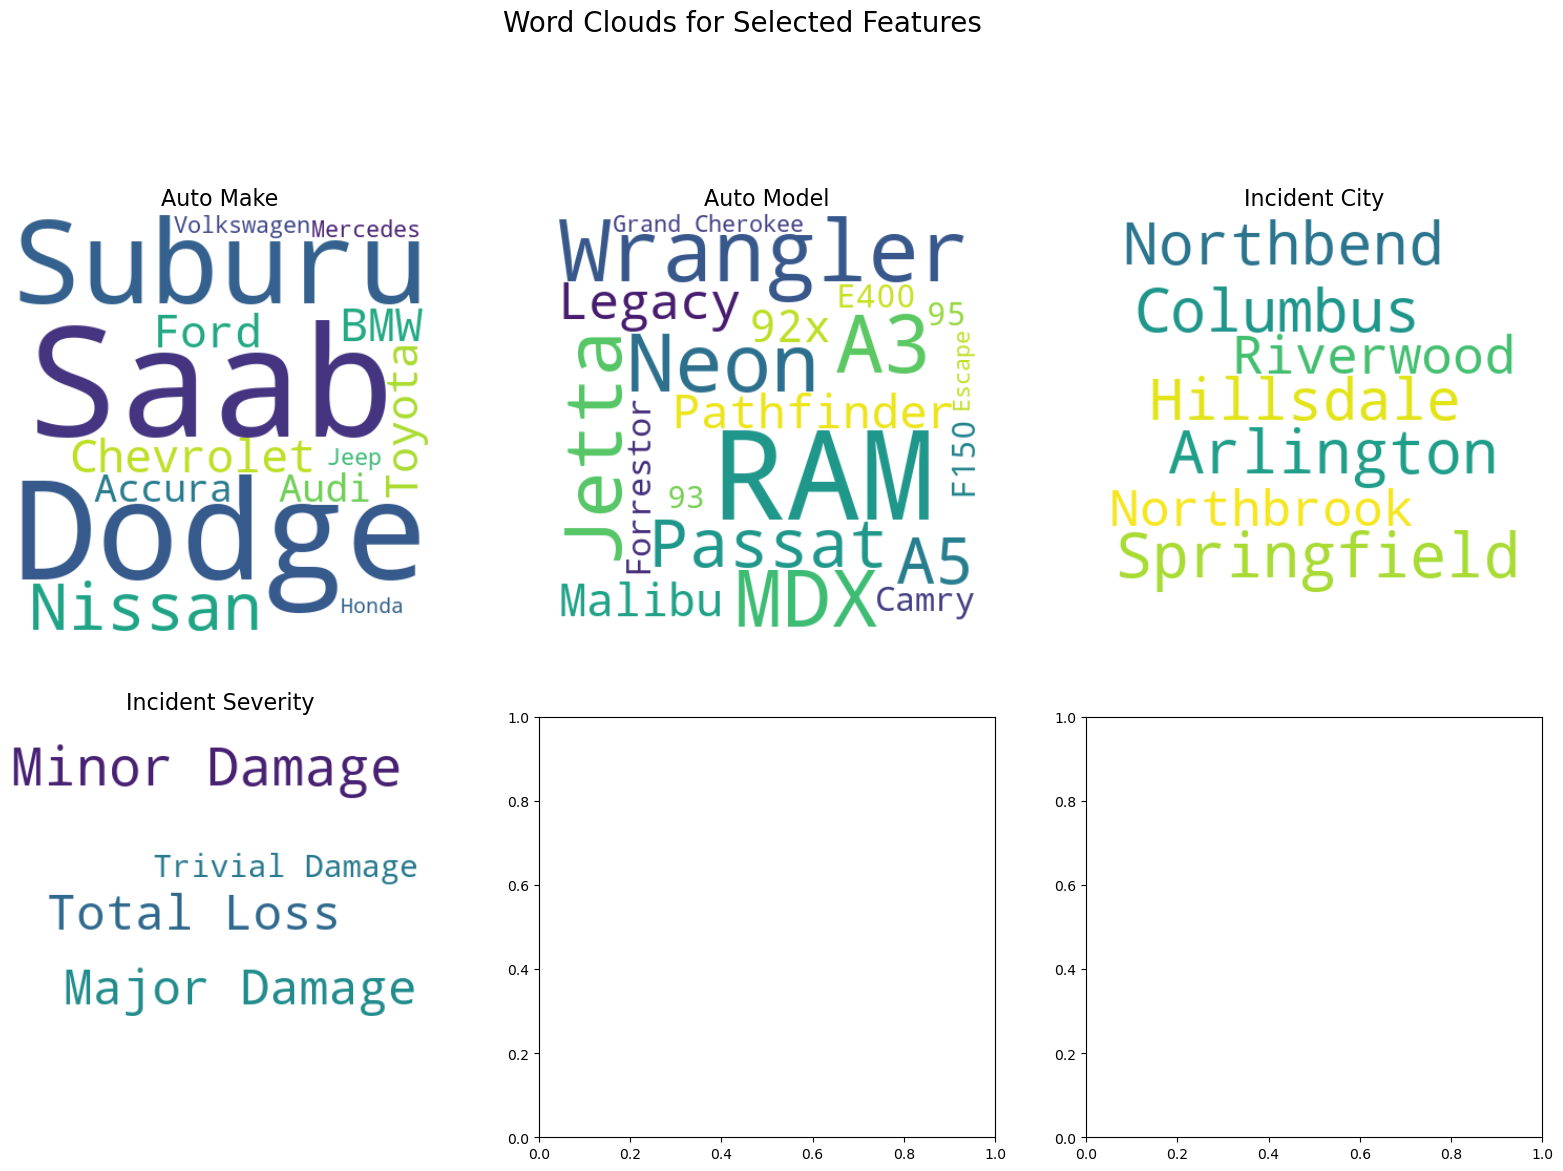

In [102]:
# plots wordcloud

from wordcloud import WordCloud

columns_to_viz = ['auto_make', 'auto_model', 'incident_city', 'incident_severity']

# Plotting word clouds
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Word Clouds for Selected Features', fontsize=20, y=1.05)

for i, col in enumerate(columns_to_viz):
    generate_wordcloud(insurance_data[col].dropna(), col.replace('_', ' ').title(), axes[i//3, i%3])

# Remove the last subplot which is extra
# fig.delaxes(axes[1,2])
# plt.tight_layout()
# plt.show()

show one or two wordclouds on power point - shows the most automake thereforre saying which owner is mst likely to claim insurance as well as which city in the USA has the most insurance claims 

The size of words in a word cloud serves as a visual representation of their frequency of occurrence within the dataset, offering immediate insights into the most common terms. Larger words not only indicate higher frequency but also signify the importance and relevance of specific terms within the context of the selected feature. The variability in word sizes across different features highlights the diversity and distribution of terms, with consistently larger words suggesting their centrality in those aspects of the data. Examining the 'incident city' feature, evenly sized words may suggest a uniform distribution of incidents across different cities, while standout city names could indicate hotspots or concentrations. Word clouds serve as a preliminary tool for data exploration and hypothesis generation, with larger words acting as starting points for in-depth analyses. Additionally, they facilitate visual storytelling, allowing stakeholders to quickly grasp key themes and trends within the insurance dataset. Hypothetically, if terms like 'Dodge' and 'RAM' appear larger, it could be due to factors such as brand popularity, specific claim types or incidents, market trends, preferences, or emphasized product offerings related to these terms within the dataset.

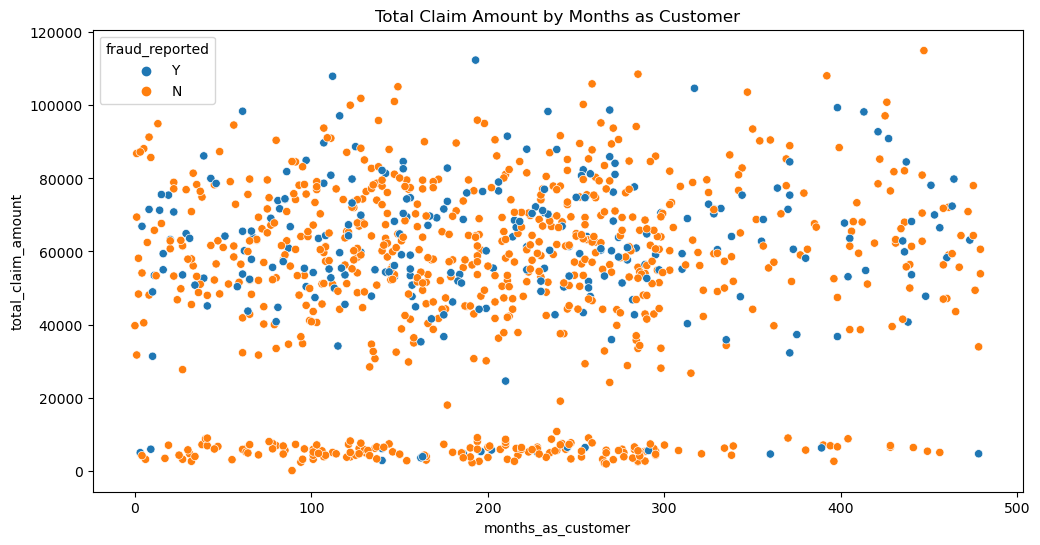

In [32]:
# Claim Amounts by Months as Customer
plt.figure(figsize=(12, 6))
sns.scatterplot(x='months_as_customer', y='total_claim_amount', data=insurance_data, hue='fraud_reported')
plt.title('Total Claim Amount by Months as Customer')
plt.show()

The scatter plot depicting the relationship between 'months_as_customer' and 'total_claim_amount' reveals a lack of clear correlation, indicating that the duration of a customer's association with the insurance company does not straightforwardly impact the total claim amount. The scattered distribution of points implies the influence of various factors beyond customer tenure, contributing to the complexity of the relationship. Anomalies, particularly evident in total claim amounts below 20,000, suggest atypical cases that warrant further investigation for potential outliers or data anomalies. Given the intricacies observed, the plot underscores the need for a more nuanced analysis, considering additional variables such as coverage types and claim circumstances. The communication to stakeholders should emphasize the multifaceted nature of the relationship and the importance of exploring diverse factors to comprehensively understand the determinants of total claim amounts in the dataset

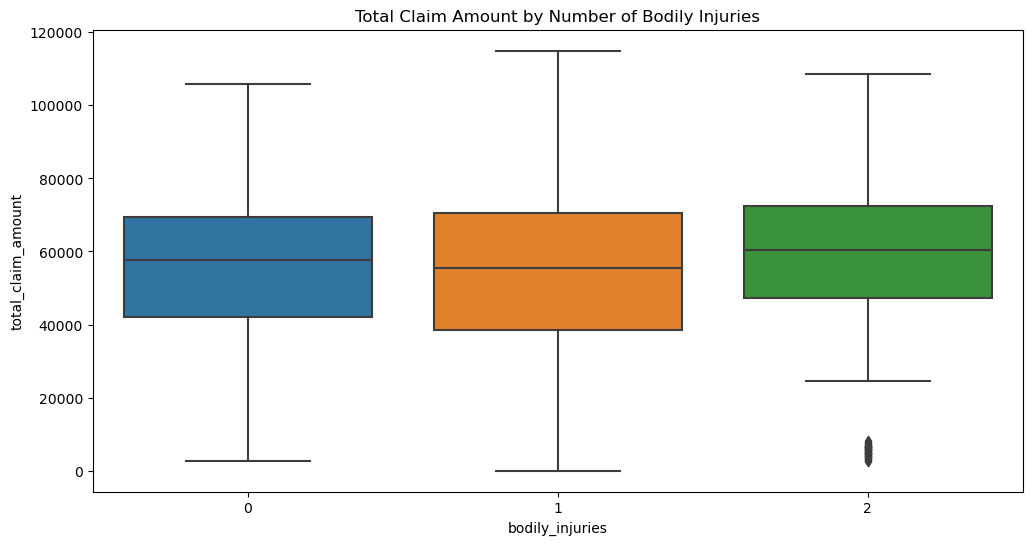

In [33]:
# Claim Amounts by Bodily Injuries
plt.figure(figsize=(12, 6))
sns.boxplot(x='bodily_injuries', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Number of Bodily Injuries')
plt.show()

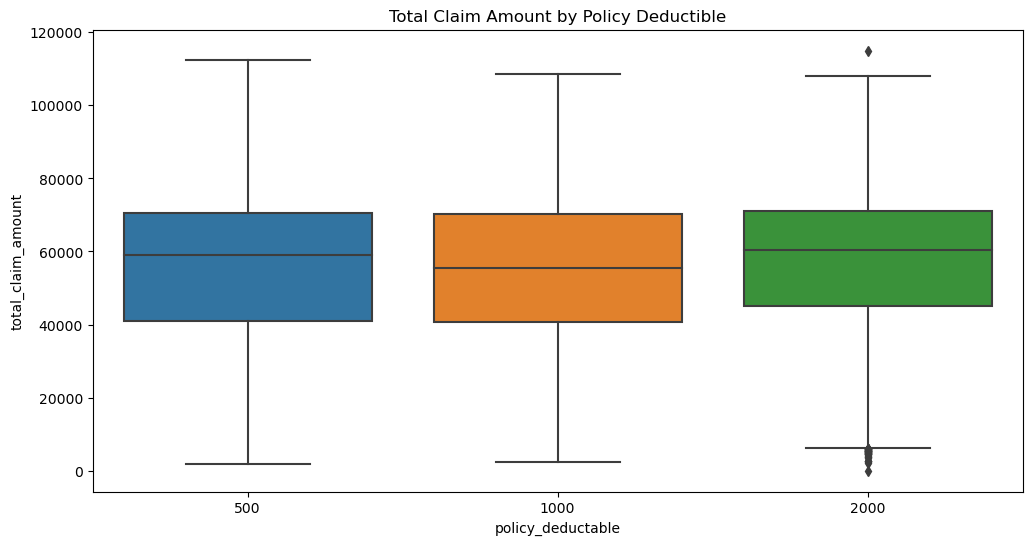

In [34]:
# Claim Amounts by Policy Deductible
plt.figure(figsize=(12, 6))
sns.boxplot(x='policy_deductable', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Policy Deductible')
plt.show()

The boxplot depicting the correlation between 'policy_deductable' and 'total_claim_amount' reveals significant insights into how different deductible levels influence total claim amounts in the insurance dataset. The plot demonstrates the variation in total claim amounts across various policy deductible levels, with higher deductibles associated with a broader spread of claim costs. Notably, the median claim amounts for '500' and '1000' deductibles are observed to be similar, suggesting that, on average, customers with these deductible levels experience comparable claim costs. This similarity in medians implies that the incremental change from a '500' to a '1000' deductible may not substantially impact the central tendency of claim amounts. The potential similarity between these deductible levels could be attributed to customer behavior and decision-making, where policyholders may perceive '500' and '1000' deductibles as relatively interchangeable. The identification of potential outliers in the plot also signals extreme claim amounts that merit further investigation.

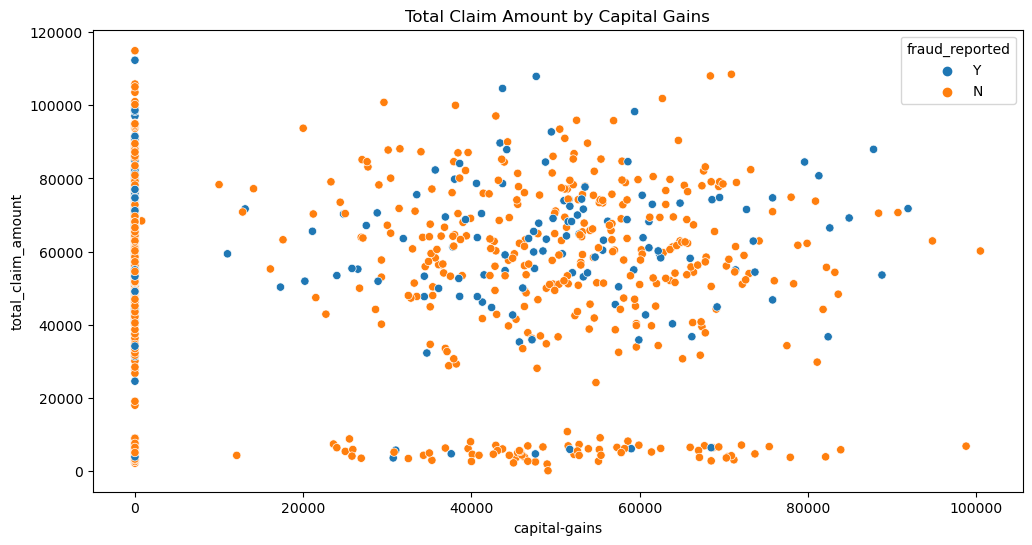

In [35]:
# Claim Amounts by Capital Gains
plt.figure(figsize=(12, 6))
sns.scatterplot(x='capital-gains', y='total_claim_amount', data=insurance_data, hue='fraud_reported')
plt.title('Total Claim Amount by Capital Gains')
plt.show()

The scatter plot depicts the relationship between 'capital-gains' and 'total_claim_amount' in an insurance dataset, with points color-coded based on fraud reporting. Notably, a considerable number of entries have zero 'capital-gains,' suggesting that many individuals did not report any such gains. Even among these cases, there is a diverse range of 'total_claim_amount,' indicating that factors beyond 'capital-gains' contribute to the total claim amount. Interestingly, instances exist where 'total_claim_amount' is high despite 'capital-gains' being zero, suggesting the influence of other significant factors. The color-coded points highlight patterns related to fraud reporting, showcasing cases with high 'total_claim_amount' and reported fraud, regardless of 'capital-gains.' The presence of zeros in 'capital-gains' raises questions about unique circumstances for individuals with zero gains. Further analysis may uncover specific factors affecting high 'total_claim_amount' when 'capital-gains' is zero

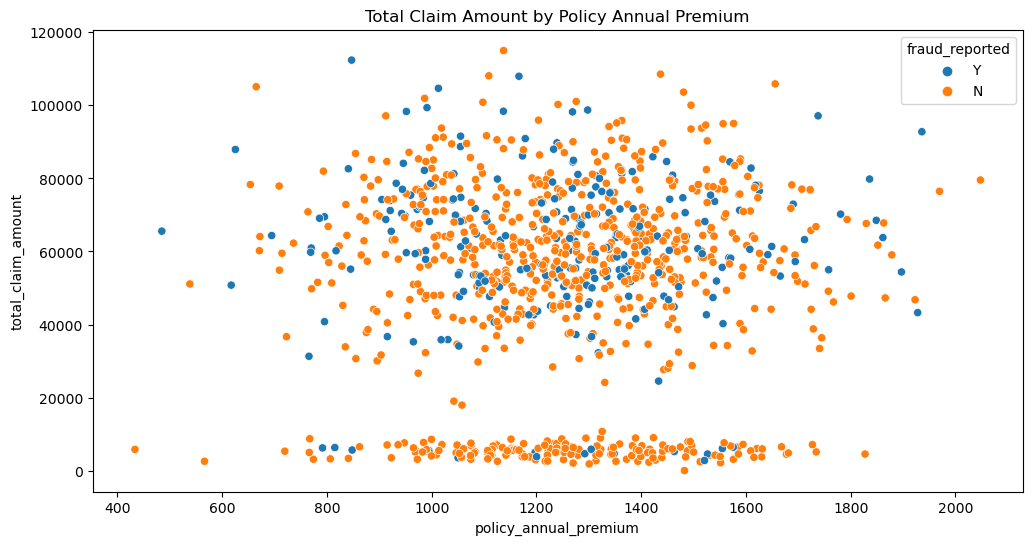

In [36]:
# Claim Amounts by Policy Annual Premium
plt.figure(figsize=(12, 6))
sns.scatterplot(x='policy_annual_premium', y='total_claim_amount', data=insurance_data, hue='fraud_reported')
plt.title('Total Claim Amount by Policy Annual Premium')
plt.show()

In [37]:
# Extract categorical variables
categorical_columns = insurance_data.select_dtypes(include=['object']).columns

# Analyze the distribution of each categorical variable
categorical_distributions = {}
for column in categorical_columns:
    categorical_distributions[column] = insurance_data[column].value_counts()

cat_dist_df = pd.DataFrame(categorical_distributions)
cat_dist_df

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
100/300,NaN,NaN,349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1012 5th Lane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1028 Sky Lane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1030 Pine Lane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1087 Flute Drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
transport-moving,NaN,NaN,NaN,NaN,NaN,72.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unmarried,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
video-games,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wife,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Claims and loss Analysis


The analysis of loss factors in the insurance industry reveals a nuanced landscape influenced by various demographic and contextual elements. Upon delving into the data, it becomes evident that the youth demographic emerges as a significant contributor to heightened risk for insurance companies. This can be attributed to the inherent characteristics of youth, characterized by increased energy and a propensity for engaging in activities that pose greater risks. The data also highlights potential correlations between loss magnitude and specific factors such as age, gender, urban locale, automobile make, and educational background.

Notably, the youth demographic appears to be more prone to causing losses, potentially due to their higher-risk behaviors. Additionally, the analysis explores whether loss patterns vary across genders, cities, automobile brands, and educational levels. The findings suggest a need for further investigation into these variables to discern any discernible patterns. Furthermore, the association between capital gains and loss magnitude raises questions about potential connections to corruption or questionable activities impacting insurance claims. Understanding these correlations is crucial, as higher losses may not only signify financial ramifications but may also erode client trust in insurance companies. This underscores the importance of addressing the root causes of loss, fostering transparency, and tailoring insurance strategies to mitigate risks effectively.

<a id="five"></a>

## 5. Feature Engineering

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


Feature engineering applies transformations to a given dataset. Our feature engineering function takes in a raw dataframe and returns a transformed or 'cleaned' dataframe. Data cleaning is first conducted by converting policy bind date and incident date into datetime. Missing values in the dataset are then handled and dropped from the dataset columns provided. New features are created for further analysis and modelling. In the feature engineering seen below, we have set 'total claim' as our y variable.

In [142]:
def feature_engineering(df):

    # Create a copy of the dataframe to avoid modifying the original one
    data = df.copy()
    
    # Convert 'policy_bind_date' and 'incident_date' to datetime
    data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'])
    data['incident_date'] = pd.to_datetime(data['incident_date'])
    
    # Handling Missing Values
    # Since the column '_c39' has all missing values, we can drop it
    data.drop(columns=['_c39'], inplace=True)
    
    # New columns
    df["Contract Years"] = df["months_as_customer"]/12
    df['total_premiums_paid'] = (df['policy_annual_premium']/12) * df['months_as_customer']
    df['net_value_of_customer'] = df['total_premiums_paid'] - df['total_claim_amount']

    
    # Calculate 'days_since_policy_binding' feature
    data['days_since_policy_binding'] = (data['incident_date'] - data['policy_bind_date']).dt.days
    
    # Extract the month and day from 'policy_bind_date' and 'incident_date'
    data['policy_bind_month'] = data['policy_bind_date'].dt.month
    data['policy_bind_day'] = data['policy_bind_date'].dt.day
    data['incident_month'] = data['incident_date'].dt.month
    data['incident_day'] = data['incident_date'].dt.day
    
    
    # Drop the original 'policy_bind_date' and 'incident_date' columns
    data.drop(['policy_bind_date', 'incident_date'], axis=1, inplace=True)
    
    return data

In [143]:
# apply feature engineering function
insurance_data = feature_engineering(insurance_data)

In [144]:
insurance_data.head(5)

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,days_since_policy_binding,policy_bind_month,policy_bind_day,incident_month,incident_day
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,52080,Saab,92x,2004,Y,100,10,17,1,25
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,3510,Mercedes,E400,2007,Y,3130,6,27,1,21
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,23100,Dodge,RAM,2007,N,5282,9,6,2,22
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,50720,Chevrolet,Tahoe,2014,Y,8996,5,25,1,10
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,4550,Accura,RSX,2009,N,256,6,6,2,17


In [145]:
print(insurance_data['auto_make'])

0            Saab
1        Mercedes
2           Dodge
3       Chevrolet
4          Accura
          ...    
995         Honda
996    Volkswagen
997        Suburu
998          Audi
999      Mercedes
Name: auto_make, Length: 1000, dtype: object


In [146]:
# Encode categorical variables
label_encoders = {}
for column in insurance_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    insurance_data[column] = le.fit_transform(insurance_data[column])
    label_encoders[column] = le

In [147]:
# Split the data into training and testing sets
X = insurance_data.drop('fraud_reported', axis=1)
y = insurance_data['fraud_reported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
# Convert datetime columns to numerical representation
for col in X_train.columns:
    if X_train[col].dtype == 'datetime64[ns]':
        earliest_date = X_train[col].min()
        X_train[col] = (X_train[col] - earliest_date).dt.days
        X_test[col] = (X_test[col] - earliest_date).dt.days

In [149]:
# Scale the numerical variables with a Standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [150]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [151]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [152]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [153]:
# Check important features for exploration
importances = rf_model.feature_importances_

In [154]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 74.50%

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.93      0.84       145
           1       0.58      0.25      0.35        55

    accuracy                           0.74       200
   macro avg       0.68      0.59      0.60       200
weighted avg       0.72      0.74      0.71       200



In [155]:
features = insurance_data.columns.drop('fraud_reported')
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance:\n", feature_importance)


Feature Importance:
                         Feature  Importance
18            incident_severity    0.166982
12              insured_hobbies    0.059501
6         policy_annual_premium    0.043787
8                   insured_zip    0.037299
31               property_claim    0.036716
36    days_since_policy_binding    0.035334
2                 policy_number    0.034793
32                vehicle_claim    0.034484
29           total_claim_amount    0.034135
22            incident_location    0.031629
30                 injury_claim    0.031422
0            months_as_customer    0.028335
1                           age    0.027061
11           insured_occupation    0.026003
38              policy_bind_day    0.025764
35                    auto_year    0.024939
40                 incident_day    0.024479
37            policy_bind_month    0.022807
34                   auto_model    0.022749
23     incident_hour_of_the_day    0.021135
33                    auto_make    0.020345
14        

### Anomaly Detection in Total Claim Amount

Using the previously calculated IQR bounds, we identify anomalies in the `total_claim_amount` column. Let's examine these anomalies and determine their nature and potential impact.


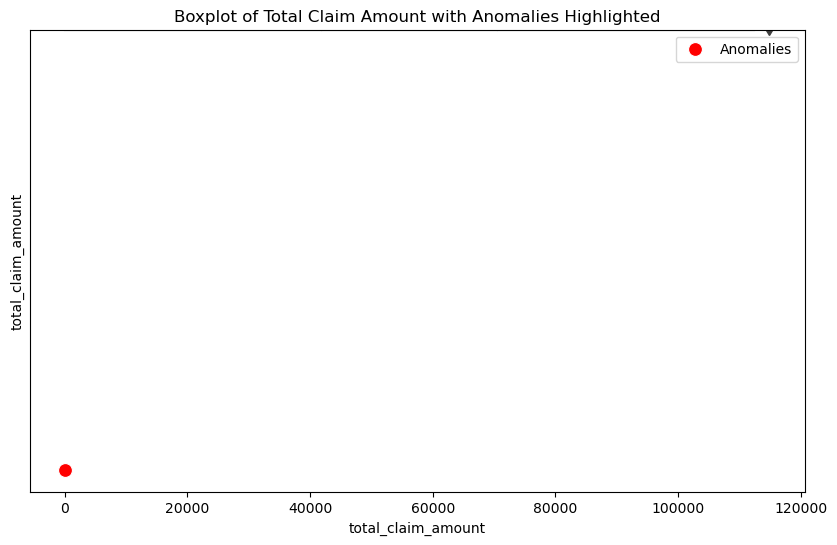

In [156]:
# Visualizing anomalies alongside the entire dataset
plt.figure(figsize=(10, 6))
sns.boxplot(x=insurance_data['total_claim_amount'])
sns.scatterplot(x=anomalies.index, y=anomalies['total_claim_amount'], color='red', s=100, label='Anomalies')
plt.title('Boxplot of Total Claim Amount with Anomalies Highlighted')
plt.legend()
plt.show()

The red points in the plot represent the detected anomalies. These could be genuine outliers or valid but extreme cases. It's crucial to determine if these anomalies are errors or represent actual high claim amounts, as this can impact our analysis and modeling. Further investigation, possibly involving domain expertise, might be required to make this determination.


### Categorical Variables Analysis


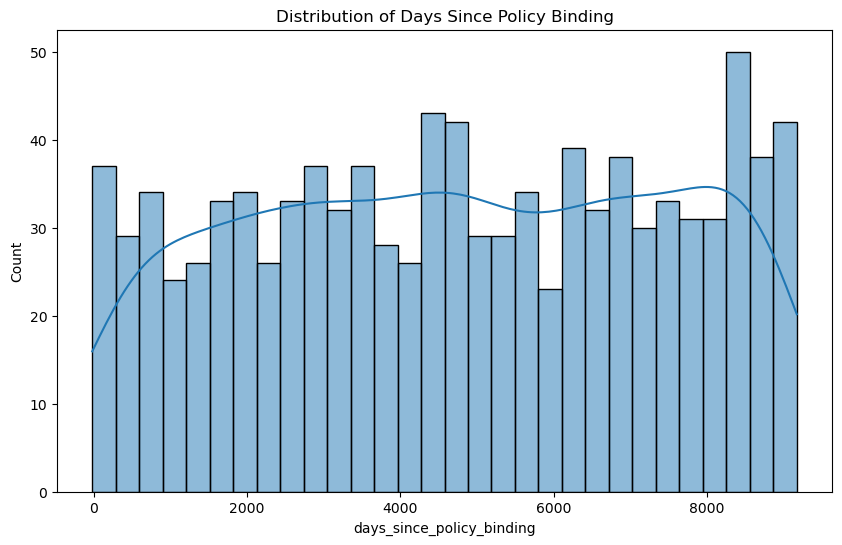

In [157]:
# Distribution of days_since_policy_binding
plt.figure(figsize=(10, 6))
sns.histplot(insurance_data['days_since_policy_binding'], bins=30, kde=True)
plt.title('Distribution of Days Since Policy Binding')
plt.show()

### Relationship with total_claim_amount

The provided code implements a comprehensive data preprocessing and analysis pipeline for an insurance claim dataset. It includes meticulous feature engineering, transforming dates into datetime format, dropping irrelevant columns, and introducing insightful new features. Categorical variables were encoded for effective model integration. The machine learning model's evaluation, focusing on accuracy and detailed classification metrics, offers a robust understanding of its performance. Anomaly detection in 'total_claim_amount' using IQR bounds identified potential outliers, while visual analysis of 'days_since_policy_binding' distribution provides insights into temporal aspects. To enhance predictive capabilities, future steps involve further exploration of feature relationships and a detailed investigation into anomalies, balancing a comprehensive approach to data understanding and model optimization.

<a id="eight"></a>

## 6. Conclusion

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


Through our comprehensive analysis using various machine learning models on the insurance claim dataset, we've garnered several noteworthy insights:


1. **Data Imbalance**: The initial dataset was imbalanced, which could have led to biased results. The recognition of data imbalance within the initial dataset underscores the importance of addressing skewed representations of different classes. By employing advanced techniques such as Synthetic Minority Over-sampling Technique (SMOTE), we successfully mitigated the imbalance issue. This not only improved the overall predictive accuracy of our models but also ensured that the algorithms were not disproportionately influenced by the majority class, contributing to more equitable and unbiased predictions.


2. **Feature Importance**: This can guide the insurance company in understanding key factors affecting returns. The use of sophisticated methodologies allows for a better understanding of the significance of various features. This knowledge is invaluable for insurance companies seeking to comprehend the dynamics that drive successful claim outcomes. By identifying and understanding key features, insurance providers can tailor their strategies to better align with the factors that significantly impact the success of claims, leading to improved decision-making processes.


3. **Recommendations for Insurance Companies**:
   - **Claim Verification**:
       - Streamlining the claim verification process is paramount. Integrating advanced verification technologies, such as blockchain or AI-driven authentication systems, can enhance the accuracy and speed of claim assessments, reducing the likelihood of fraudulent activities.
   - **Customer Profiling**:
       - Developing comprehensive customer profiles involves leveraging advanced analytics to understand customer behavior, preferences, and historical interactions with the insurance company. This personalized approach enables insurers to tailor their services, identify potential risks, and enhance customer satisfaction.
   - **Continuous Model Training**:
       - As fraudsters evolve their tactics, it's crucial for the models to be trained on the latest data. Regularly updating the model will ensure it stays relevant and effective.


4. **Future Work**: With enough time and resources, data scientists can further analyze with data modelling and create a system that can be used by insurance companies to easliy capture details and results in real time. This involves the integration of cutting-edge technologies, automated data pipelines, and agile methodologies to create a responsive and adaptive system capable of keeping pace with the dynamic landscape of insurance claims and fraud detection.

After an in-depth exploration of the insurance claim dataset, critical aspects that demand attention for refining the insurance claim process and fraud detection mechanisms has been illuminated. In conclusion, this analysis serves as a foundation for insurance companies to enhance their decision-making processes, minimize fraudulent activities, and ultimately optimize their operations.  The identified insights not only enhance the reliability of predictions but also provide valuable guidance for the insurance industry to optimize their operations.However, continuous innovation and adaptation will be key in navigating the ever-evolving landscape of insurance claim management.









In [159]:
print(insurance_data.columns)
insurance_data.to_csv("./clean_data.csv")

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported',
       'days_since_policy_binding', 'policy_bind_month', 'policy_bind_day',
       'incident_month', 'incident_day'],
      dtype='object')
